### Minimal execution

This notebook does a minimal execution of the sisepuede model with all the default strategies.

In [1]:
import copy
import datetime as dt
import importlib # needed so that we can reload packages
import ipywidgets as wdg
import matplotlib.pyplot as plt
import os, os.path
import numpy as np
import pandas as pd
import pathlib
import sys
import time
from typing import Union
import warnings
warnings.filterwarnings("ignore")

# add SISEPUEDE to path
dir_py = pathlib.Path(os.path.realpath(".")).parents[1]
if str(dir_py) not in sys.path:
    sys.path.append(str(dir_py))

    
##  IMPORT SISEPUEDE EXAMPLES AND TRANSFORMERS

from sisepuede.manager.sisepuede_examples import SISEPUEDEExamples
import sisepuede.core.support_classes as sc
import sisepuede.transformers as trf
import sisepuede.utilities._toolbox as sf

In [2]:
examples = SISEPUEDEExamples()
cr = examples("input_data_frame")
cr.head()

,region,time_period,avgload_trns_freight_tonne_per_vehicle_aviation,avgload_trns_freight_tonne_per_vehicle_rail_freight,avgload_trns_freight_tonne_per_vehicle_road_heavy_freight,avgload_trns_freight_tonne_per_vehicle_water_borne,avgmass_lvst_animal_buffalo_kg,avgmass_lvst_animal_cattle_dairy_kg,avgmass_lvst_animal_cattle_nondairy_kg,avgmass_lvst_animal_chickens_kg,...,ef_ippu_tonne_cf4_per_tonne_production_electronics,ef_ippu_tonne_cf4_per_tonne_production_metals,ef_ippu_tonne_c3f8_per_tonne_production_chemicals,ef_ippu_tonne_c3f8_per_tonne_production_electronics,ef_ippu_tonne_c4f10_per_mmm_gdp_product_use_ods_other,ef_ippu_tonne_c4f10_per_tonne_production_chemicals,ef_ippu_tonne_c6f14_per_mmm_gdp_product_use_ods_other,ef_ippu_tonne_c6f14_per_tonne_production_chemicals,ef_ippu_tonne_cc4f8_per_tonne_production_chemicals,ef_ippu_tonne_cc4f8_per_tonne_production_electronics
0,costa_rica,0,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.000002,4.204879e-07,0.0,1.515048e-07,0.0,0.0,0.0,0.0,0.0,5.669821e-08
1,costa_rica,1,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.000002,2.134675e-07,0.0,1.313925e-07,0.0,0.0,0.0,0.0,0.0,5.185820e-08
2,costa_rica,2,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.000002,1.821067e-07,0.0,1.060066e-07,0.0,0.0,0.0,0.0,0.0,5.269348e-08
3,costa_rica,3,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.000002,2.094712e-07,0.0,1.093024e-07,0.0,0.0,0.0,0.0,0.0,5.500450e-08
4,costa_rica,4,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.000002,3.446161e-07,0.0,1.046451e-07,0.0,0.0,0.0,0.0,0.0,5.266081e-08


In [3]:
# Set Iran folder path
iran_profile_path = '../country_profiles/iran'

In [4]:
df_input = pd.read_csv(os.path.join(iran_profile_path, 'real_data.csv'))
df_input["region"] = "iran"

# The current real_data files created with the old data pipeline do not include data for columns related to ammonia
df_input[list(set(cr.columns) - set(df_input.columns))] = cr[list(set(cr.columns) - set(df_input.columns))]
df_input.head()

,iso_code3,Year,ef_lndu_conv_other_to_wetlands_gg_co2_ha,pop_lvst_initial_buffalo,ef_lndu_conv_other_to_forests_primary_gg_co2_ha,frac_lvst_mm_cattle_dairy_solid_storage,frac_lvst_mm_goats_anaerobic_lagoon,frac_lvst_mm_pigs_poultry_manure,pij_lndu_grasslands_to_croplands,frac_agrc_vegetables_and_vines_cl1_tropical,...,nemomod_entc_emissions_activity_ratio_scalar_fp_hydrogen_reformation_ccs_co2,nemomod_entc_output_activity_ratio_fuel_production_fp_hydrogen_reformation_ccs_hydrogen,frac_trns_fuelmix_water_borne_ammonia,nemomod_entc_input_activity_ratio_fuel_production_fp_hydrogen_reformation_ccs_oil,nemomod_entc_emissions_activity_ratio_fuel_production_fp_hydrogen_reformation_ccs_tonne_co2_per_tj,nemomod_entc_input_activity_ratio_fuel_production_fp_hydrogen_reformation_ccs_natural_gas,ef_enfu_stationary_combustion_tonne_n2o_per_tj_fuel_water,nemomod_entc_input_activity_ratio_fuel_production_fp_ammonia_production_electricity,frac_enfu_fuel_demand_imported_pj_fuel_ammonia,nemomod_entc_input_activity_ratio_fuel_production_fp_hydrogen_electrolysis_water
0,IRN,2015,0.000822,101056.0,0.0,0.14,0.0,0.0,0.003083,0.0,...,1,1,0.0,0.0,22.279811,1.315,0.0,0.325,0,0.000004
1,IRN,2016,0.000822,125143.0,0.0,0.14,0.0,0.0,0.001159,0.0,...,1,1,0.0,0.0,22.279811,1.315,0.0,0.325,0,0.000004
2,IRN,2017,0.000822,126765.0,0.0,0.14,0.0,0.0,0.003394,0.0,...,1,1,0.0,0.0,22.279811,1.315,0.0,0.325,0,0.000004
3,IRN,2018,0.000822,136062.0,0.0,0.14,0.0,0.0,0.009995,0.0,...,1,1,0.0,0.0,22.279811,1.315,0.0,0.325,0,0.000004
4,IRN,2019,0.000822,144962.0,0.0,0.14,0.0,0.0,0.000000,0.0,...,1,1,0.0,0.0,22.279811,1.315,0.0,0.325,0,0.000004


In [5]:
# Cheking that we have the ammonia columns in our df_input
df_input[[i for i in df_input.columns if 'ammonia' in i]].head()

,cost_enfu_fuel_ammonia_usd_per_tonne,ef_trns_mobile_combustion_water_borne_kg_n2o_per_tj_ammonia,nemomod_entc_capital_cost_fp_ammonia_production_mm_usd_per_gw,nemomod_entc_input_activity_ratio_fuel_production_fp_ammonia_production_hydrogen,energydensity_gravimetric_enfu_gj_per_tonne_fuel_ammonia,ef_enfu_stationary_combustion_tonne_n2o_per_tj_fuel_ammonia,nemomod_entc_fixed_cost_fp_ammonia_production_mm_usd_per_gw,nemomod_entc_output_activity_ratio_fuel_production_fp_ammonia_production_ammonia,ef_enfu_stationary_combustion_tonne_ch4_per_tj_fuel_ammonia,exports_enfu_pj_fuel_ammonia,ef_enfu_combustion_tonne_co2_per_tj_fuel_ammonia,frac_trns_fuelmix_water_borne_ammonia,nemomod_entc_input_activity_ratio_fuel_production_fp_ammonia_production_electricity,frac_enfu_fuel_demand_imported_pj_fuel_ammonia
0,100,0.0001,0,0.176,18.6,0.0001,10,1,0,1.2,0,0.0,0.325,0
1,100,0.0001,0,0.176,18.6,0.0001,10,1,0,1.2,0,0.0,0.325,0
2,100,0.0001,0,0.176,18.6,0.0001,10,1,0,1.2,0,0.0,0.325,0
3,100,0.0001,0,0.176,18.6,0.0001,10,1,0,1.2,0,0.0,0.325,0
4,100,0.0001,0,0.176,18.6,0.0001,10,1,0,1.2,0,0.0,0.325,0


In [6]:
# We import the transformers class
import sisepuede.transformers.transformers as trfs
importlib.reload(trfs)

# We create a transformers class instance by passing the real_data.csv as df_input 
transformers = trfs.Transformers(
    {}, # Why do we need this empty dictionary?
    df_input = df_input,
)

# set some shortcuts
mat = transformers.model_attributes
time_periods = sc.TimePeriods(mat);

# How do we define a collection `Transformations` (which are required to build `Strategies`)?
- `Transformations` are collections of `Transformation` objects
- They are defined in collections of configuration files stored in a _Strategy Directory_
    - The _Strategy Directory_ contains information about transformations, strategic combinations, and even citations
- The easiest way to begin is to instantiate a default strategy directory;
    - **It will export one `Transformation` YAML configuration file for each `Transformer` object and prepopulate with defaults. From there, you can modify parameters or duplicate as needed.** 
    - **Each Transformation MUST have a unique Transformation code to be counted**
    - **Note that there can be multiple `Transformation` files associated with a single `Transformer`**
    - A default strategy definition file is also created that includes:
        - Base case (required)
        - All singleton strategies (1:1 mapping with `Transformation` objects that are defined)
        - Sectoral combinations (the instantation chooses one `Transformation` per `Transformer` to include)
        - All (using the same one `Transformation` per `Transformer`)

In [7]:
"""
Here we will create a default strategy directory using the dir_transformation_out path.
We will pass the transformers instance (this includes the input file) and the path so it can create the
folder and generate default transformations yaml files for each transformer

"""
dir_transformations_out = os.path.join(iran_profile_path, 'iran_transformations')
trf.instantiate_default_strategy_directory(
    transformers,
    dir_transformations_out,
)


In [8]:
"""
In the cell above we created a folder that stores transformations yaml files that parametrize each transformer. This parameters are set to default values so
you might one to change them or even create more yaml files to parametrize a transformer in different ways. Once this process is finished, we need to load back
the yaml files to a transformations instance. Here we pass the yaml files path and the transformers object that includes our input file.

"""
transformations = trf.Transformations(
    dir_transformations_out,
    transformers = transformers,
)

# Check the transformations we have available with the yaml files we created/edited
transformations.attribute_transformation

,transformation_id,transformation_code,transformation_name,description,citations,path
0,0,TX:BASE,None,None,None,None
1,1,TX:AGRC:DEC_CH4_RICE,Default Value - AGRC: Improve rice management,Reduce :math:`\text{CH}_4` emissions from rice...,None,../country_profiles/iran/iran_transformations/...
2,2,TX:AGRC:DEC_EXPORTS,Default Value - AGRC: Decrease Exports,Decrease agricultural exports by 50% (relative...,None,../country_profiles/iran/iran_transformations/...
3,3,TX:AGRC:DEC_LOSSES_SUPPLY_CHAIN,Default Value - AGRC: Reduce supply chain losses,Reduce waste food waste in the agricultural (c...,None,../country_profiles/iran/iran_transformations/...
4,4,TX:AGRC:INC_CONSERVATION_AGRICULTURE,Default Value - AGRC: Expand conservation agri...,| Decrease soil organic carbon loss in cropla...,None,../country_profiles/iran/iran_transformations/...
...,...,...,...,...,...,...
59,59,TX:WASO:INC_CAPTURE_BIOGAS,Default Value - WASO: Increase biogas capture,Increase fraction of biogas captured from land...,None,../country_profiles/iran/iran_transformations/...
60,60,TX:WASO:INC_ENERGY_FROM_BIOGAS,Default Value - WASO: Biogas for energy produc...,Increase the fraction of biogas that is collec...,None,../country_profiles/iran/iran_transformations/...
61,61,TX:WASO:INC_ENERGY_FROM_INCINERATION,Default Value - WASO: Incineration for energy ...,None,None,../country_profiles/iran/iran_transformations/...
62,62,TX:WASO:INC_LANDFILLING,Default Value - WASO: Increase landfilling,Increase fraction of waste that is otherwise u...,None,../country_profiles/iran/iran_transformations/...


In [9]:
# Example of how a single transformation is applied using the transformation_code 
tr_landfilling = transformations.get_transformation("TX:WASO:INC_LANDFILLING")

# This df has our input data already modified by the transformation
tr_landfilling().head()

,iso_code3,Year,ef_lndu_conv_other_to_wetlands_gg_co2_ha,pop_lvst_initial_buffalo,ef_lndu_conv_other_to_forests_primary_gg_co2_ha,frac_lvst_mm_cattle_dairy_solid_storage,frac_lvst_mm_goats_anaerobic_lagoon,frac_lvst_mm_pigs_poultry_manure,pij_lndu_grasslands_to_croplands,frac_agrc_vegetables_and_vines_cl1_tropical,...,nemomod_entc_emissions_activity_ratio_scalar_fp_hydrogen_reformation_ccs_co2,nemomod_entc_output_activity_ratio_fuel_production_fp_hydrogen_reformation_ccs_hydrogen,frac_trns_fuelmix_water_borne_ammonia,nemomod_entc_input_activity_ratio_fuel_production_fp_hydrogen_reformation_ccs_oil,nemomod_entc_emissions_activity_ratio_fuel_production_fp_hydrogen_reformation_ccs_tonne_co2_per_tj,nemomod_entc_input_activity_ratio_fuel_production_fp_hydrogen_reformation_ccs_natural_gas,ef_enfu_stationary_combustion_tonne_n2o_per_tj_fuel_water,nemomod_entc_input_activity_ratio_fuel_production_fp_ammonia_production_electricity,frac_enfu_fuel_demand_imported_pj_fuel_ammonia,nemomod_entc_input_activity_ratio_fuel_production_fp_hydrogen_electrolysis_water
0,IRN,2015,0.000822,101056.0,0.0,0.14,0.0,0.0,0.003083,0.0,...,1,1,0.0,0.0,22.279811,1.315,0.0,0.325,0,0.000004
1,IRN,2016,0.000822,125143.0,0.0,0.14,0.0,0.0,0.001159,0.0,...,1,1,0.0,0.0,22.279811,1.315,0.0,0.325,0,0.000004
2,IRN,2017,0.000822,126765.0,0.0,0.14,0.0,0.0,0.003394,0.0,...,1,1,0.0,0.0,22.279811,1.315,0.0,0.325,0,0.000004
3,IRN,2018,0.000822,136062.0,0.0,0.14,0.0,0.0,0.009995,0.0,...,1,1,0.0,0.0,22.279811,1.315,0.0,0.325,0,0.000004
4,IRN,2019,0.000822,144962.0,0.0,0.14,0.0,0.0,0.000000,0.0,...,1,1,0.0,0.0,22.279811,1.315,0.0,0.325,0,0.000004


# Next, let's build some individual strategies
- A `Strategy` is a combination of `Transformations`; this approach allows for extensive variation in parameterization--including timing, magnitude, and categorization--of `Transformers`.
- A `Strategy` requires the following to be instatiated:
    - `strategy_id`
    - `transformation_specification`: If None or "", returns baseline strategy. Otherwise, can be a list of `Transformation` codes OR a pipe (i.e., "|") -delimited string
    - `Transformations` object used to combine `Transformation` functions
- Similar to a `Transformation`, a `Strategy` is callable

In [10]:
# Example of a baseline strategy that is created with no transformations
strat = trf.Strategy(
    0,
    None,
    transformations,
)

# Example of a strategy that is created with a couple of transformation codes
strat1 = trf.Strategy(
    1,
    "TX:LSMM:INC_MANAGEMENT_CATTLE_PIGS|TX:LSMM:INC_CAPTURE_BIOGAS",
    transformations,
)


##  Similar to a `Transformation` and `Transformer`, a `Strategy` is callable
- Note that it is pre-populated with the `strategy_id` (the field associated with `model_attributes.dim_strategy_id`)

In [11]:
# Returns the input data with the strategy applied to it
strat1().head()

,strategy_id,iso_code3,Year,ef_lndu_conv_other_to_wetlands_gg_co2_ha,pop_lvst_initial_buffalo,ef_lndu_conv_other_to_forests_primary_gg_co2_ha,frac_lvst_mm_cattle_dairy_solid_storage,frac_lvst_mm_goats_anaerobic_lagoon,frac_lvst_mm_pigs_poultry_manure,pij_lndu_grasslands_to_croplands,...,nemomod_entc_emissions_activity_ratio_scalar_fp_hydrogen_reformation_ccs_co2,nemomod_entc_output_activity_ratio_fuel_production_fp_hydrogen_reformation_ccs_hydrogen,frac_trns_fuelmix_water_borne_ammonia,nemomod_entc_input_activity_ratio_fuel_production_fp_hydrogen_reformation_ccs_oil,nemomod_entc_emissions_activity_ratio_fuel_production_fp_hydrogen_reformation_ccs_tonne_co2_per_tj,nemomod_entc_input_activity_ratio_fuel_production_fp_hydrogen_reformation_ccs_natural_gas,ef_enfu_stationary_combustion_tonne_n2o_per_tj_fuel_water,nemomod_entc_input_activity_ratio_fuel_production_fp_ammonia_production_electricity,frac_enfu_fuel_demand_imported_pj_fuel_ammonia,nemomod_entc_input_activity_ratio_fuel_production_fp_hydrogen_electrolysis_water
0,1,IRN,2015,0.000822,101056.0,0.0,0.14,0.0,0.0,0.003083,...,1,1,0.0,0.0,22.279811,1.315,0.0,0.325,0,0.000004
1,1,IRN,2016,0.000822,125143.0,0.0,0.14,0.0,0.0,0.001159,...,1,1,0.0,0.0,22.279811,1.315,0.0,0.325,0,0.000004
2,1,IRN,2017,0.000822,126765.0,0.0,0.14,0.0,0.0,0.003394,...,1,1,0.0,0.0,22.279811,1.315,0.0,0.325,0,0.000004
3,1,IRN,2018,0.000822,136062.0,0.0,0.14,0.0,0.0,0.009995,...,1,1,0.0,0.0,22.279811,1.315,0.0,0.325,0,0.000004
4,1,IRN,2019,0.000822,144962.0,0.0,0.14,0.0,0.0,0.000000,...,1,1,0.0,0.0,22.279811,1.315,0.0,0.325,0,0.000004


##  Strategies can be instantied from a **Strategy Directory**

A **Strategy Directory** is a self-contained definition set for strategies. The directory contains configuration files for the baseline and transformations, an optional citations database, and a strategy definition file. This directory also is the default output location for any Templates that are built using these files.

Below, we can call the `Strategies` object to build strategies. 
- Note the `prebuild` option; setting this to True will build all strategies and store them in a dataframe upon instantiation. 

In [12]:
"""
When creating an instance of the Strategies class we will create
a strategy directory with all the default strategies stored in excel files. These excel files are called templates or calibrated templates.
We have one excel file per sisepuede category (AFOLU, CircularEconomy, etc).
This excel templates are not completed yet, in the following cells we will learn how to fill them out with the strategies.

"""
t0 = time.time()
strategies = trf.Strategies(
    transformations,
    export_path = "transformations", #If we set it to transformations then it will store the strategies directory where our transformations yaml files are.
    prebuild = True,
)

t_elapse = sf.get_time_elapsed(t0)
print(f"Strategies defined at {strategies.transformations.dir_init} initialized in {t_elapse} seconds")


Strategies defined at ../country_profiles/iran/iran_transformations initialized in 5.73 seconds


##  Before reading into SISEPUEDE, input templates must built

- If you try to instantiate SISEPUEDE using a Strategy directory without templates, an error will occur
- use the `Strategies.build_strategies_to_templates()` method to build outputs
    - Note two important keyword arguments that are passed to `input_template.template_from_inputs()`:
        - df_trajgroup: optional dataframe mapping variable specifications to trajectory groups. The user only has to specify fields for which they want to defined a trajectory group in addition to the group (integer) that they want to assign the field to. (default None)
        - include_simplex_group_as_trajgroup: default to include simplex group from attributes as trajectory group? (default True)
        - see `?strategies.build_strategies_to_templates` for more details on these arguments

In [13]:
?strategies.build_strategies_to_templates

Signature:
strategies.build_strategies_to_templates(
    df_base_trajectories: Optional[pandas.core.frame.DataFrame] = None,
    df_exogenous_strategies: Optional[pandas.core.frame.DataFrame] = None,
    regions: Optional[List[str]] = None,
    replace_template: bool = False,
    return_q: bool = False,
    sectors: Union[List[str], str] = None,
    strategies: Union[List[str], List[int], NoneType] = None,
    **kwargs,
) -> pandas.core.frame.DataFrame
Docstring:
Return a long (by model_attributes.dim_strategy_id) concatenated
    DataFrame of transformations.

Function Arguments
------------------

Keyword Arguments
-----------------
- df_base_trajectories: baseline (untransformed) data frame to use to 
    build strategies. Must contain self.key_region and 
    model_attributes.dim_time_period in columns. If None, defaults
    to self.baseline_inputs
- df_exogenous_strategies: optional exogenous strategies to pass. Must 
    contain self.key_region and model_attributes.dim_time_perio

##  Let's build our templates using `Strategies.build_strategies_to_templates()`
- First, let's specify some variable trajectory groups--these are groups of fields that share an LHC trial when varying in experiments
- We can pull a default example using the `SISEPUEDEExamples.variable_trajectory_group_specification` (see below)


In [14]:
# call the example
df_vargroups = examples("variable_trajectory_group_specification")
df_vargroups


,variable,variable_trajectory_group
0,ef_lvst_entferm_buffalo_kg_ch4_head,1
1,ef_lvst_entferm_cattle_dairy_kg_ch4_head,1
2,ef_lvst_entferm_cattle_nondairy_kg_ch4_head,1
3,ef_lvst_entferm_goats_kg_ch4_head,1
4,ef_lvst_entferm_sheep_kg_ch4_head,1
...,...,...
756,scalar_lvst_carrying_capacity,45
757,scalar_scoe_appliance_energy_demand_commercial...,46
758,scalar_scoe_appliance_energy_demand_residential,46
759,scalar_scoe_heat_energy_demand_commercial_muni...,47


###   Let's see available strategies and pick some

- Additionally, the strategy attribute table from the default instantiation defines over 60 strategies; building all of these could be time-consuming. We can restrict the strategies we want to build by specifying IDs in the `strategies` keyword argument
- `strategies.attribute_table` is an attribute table; `strategies.attribute_table.table` is a data frame that can be accessed using standard Pandas methods

In [15]:
strategies.attribute_table

,strategy_id,strategy_code,strategy,description,transformation_specification,baseline_strategy_id
0,0,BASE,Strategy TX:BASE,NaN,TX:BASE,1
1,1000,AGRC:DEC_CH4_RICE,Singleton - Default Value - AGRC: Improve rice...,NaN,TX:AGRC:DEC_CH4_RICE,0
2,1001,AGRC:DEC_EXPORTS,Singleton - Default Value - AGRC: Decrease Exp...,NaN,TX:AGRC:DEC_EXPORTS,0
3,1002,AGRC:DEC_LOSSES_SUPPLY_CHAIN,Singleton - Default Value - AGRC: Reduce suppl...,NaN,TX:AGRC:DEC_LOSSES_SUPPLY_CHAIN,0
4,1003,AGRC:INC_CONSERVATION_AGRICULTURE,Singleton - Default Value - AGRC: Expand conse...,NaN,TX:AGRC:INC_CONSERVATION_AGRICULTURE,0
...,...,...,...,...,...,...
64,4005,IPPU:DEC_PFCS,Singleton - Default Value - IPPU: Reduce use o...,NaN,TX:IPPU:DEC_PFCS,0
65,4006,IP:ALL,Sectoral Composite - IPPU,All (unique by transformer) IPPU transformations,TX:IPPU:DEC_CLINKER|TX:IPPU:DEC_DEMAND|TX:IPPU...,0
66,6000,PFLO:INC_HEALTHIER_DIETS,Singleton - Default Value - PFLO: Change diets,NaN,TX:PFLO:INC_HEALTHIER_DIETS,0
67,6001,PFLO:INC_IND_CCS,Singleton - Default Value - PFLO: Industrial c...,NaN,TX:PFLO:INC_IND_CCS,0


###  Finally, let's build the templates to `transformations.dir_init` directory
- you can specify elements of strategies using any combination of strategy id, name, or code
- The baseline is always included

In [16]:
"""
This method is applied to our strategies instance to complete our excel templates with 
the strategies we define in the strategies parameter which is a list where the first element
is 0 (baseline) and then we have the strategy codes.

"""
strategies.build_strategies_to_templates(
    df_trajgroup = df_vargroups, # we pass the trajectory groups we defined above
    include_simplex_group_as_trajgroup = True,
    strategies = [0, "AF:ALL", "CE:ALL", "EN:ALL", "IP:ALL", "PFLO:ALL"],
)

0

In [24]:
# This initializes the ssp model with the strategies we defined

import sisepuede as si
ssp = si.SISEPUEDE(
    "calibrated",
    initialize_as_dummy = False, # no connection to Julia is initialized if set to True
    regions = ["iran"],
    db_type = "csv",
    strategies = strategies,
    try_exogenous_xl_types_in_variable_specification = True,
)

2024-10-22 10:27:19,474 - INFO - Successfully initialized SISEPUEDEFileStructure.
2024-10-22 10:27:19,476 - WARNING - Missing key dict_dimensional_keys: key time_series not found. Tables that rely on the time_series will not have index checking.
2024-10-22 10:27:19,477 - INFO - 	Setting export engine to 'csv'.
2024-10-22 10:27:19,478 - WARNING - No index fields defined. Index field values will not be checked when writing to tables.
2024-10-22 10:27:19,479 - INFO - Successfully instantiated table ANALYSIS_METADATA
2024-10-22 10:27:19,479 - WARNING - No index fields found in ATTRIBUTE_DESIGN. Initializing index fields.
2024-10-22 10:27:19,480 - INFO - Successfully instantiated table ATTRIBUTE_DESIGN
2024-10-22 10:27:19,481 - WARNING - No index fields found in ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES. Initializing index fields.
2024-10-22 10:27:19,482 - INFO - Successfully instantiated table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES
2024-10-22 10:27:19,483 - WARNING - No index fi

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


Precompiling NemoMod...
Info Given NemoMod was explicitly requested, output will be shown live 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
   2632.5 ms  ? NemoMod
[ Info: Precompiling NemoMod [a3c327a0-d2f0-11e8-37fd-d12fd35c3c72] 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
┌ Info: Skipping precompilation due to precompilable error. Importing NemoMod [a3c327a0-d2f0-11e8-37fd-d12fd35c3c72].
└   exception = Error when precompiling module, potentially caused by a __precompile__(false) declaration in the module.
2024-10-22 10:28:24,663 - INFO - Successfully initialized JuMP optimizer from solver module HiGHS.
2024-10-22 10:28:24,720 - INFO - Successfully initialized SISEPUEDEModels.
2024-10-22 10:28:24,748 - INFO - Table ANALYSIS_METADATA successfully written to /home/tony-ubuntu/anaconda3/envs/ssp_env/lib/python3.11

In [17]:
# These are the simulation parameters for ssp
# We define how many futures, what type of desing and what strategies are we applying
dict_run = {
    ssp.key_future: [0],
    ssp.key_design: [0],
    ssp.key_strategy: [
        0, 
        strategies.get_strategy_id("EN:ALL"),
    ],
}
dict_run

NameError: name 'ssp' is not defined

In [18]:
from create_transfromation_report import CreateTransformationReport

In [19]:
transformation_report = CreateTransformationReport('../country_profiles/iran/iran_transformations')
df = transformation_report.generate_report()
df.head(10)

,transformation_code,transformation_name,description,magnitude,subsector,sectors
0,TX:TRNS:SHIFT_FUEL_LIGHT_DUTY,Electrify light duty road transport,None,0.70,TRNS,Energy
1,TX:WALI:INC_TREATMENT_INDUSTRIAL,Improved industrial wastewater treatment,None,NaN,WALI,CircularEconomy
2,TX:IPPU:DEC_HFCS,Reduce use of HFCs,None,0.10,IPPU,IPPU
3,TX:LNDU:DEC_SOC_LOSS_PASTURES,Expand sustainable grazing practices,| Decrease soil organic carbon loss in grassl...,0.95,LNDU,AFOLU
4,TX:LNDU:PLUR,Partial land use reallocation,Set land use reallocation factor to 0.5,0.50,LNDU,AFOLU
5,TX:WASO:DEC_CONSUMER_FOOD_WASTE,Consumer food waste reduction,Reduce the amount of food waste generated per ...,0.30,WASO,CircularEconomy
6,TX:TRDE:DEC_DEMAND,Reduce demand for transport,None,0.25,TRDE,Energy
7,TX:WASO:INC_RECYCLING,Increase recycling,None,0.95,WASO,CircularEconomy
8,TX:INEN:INC_EFFICIENCY_PRODUCTION,Maximize industrial production efficiency,None,0.40,INEN,Energy
9,TX:WALI:INC_TREATMENT_RURAL,Improved rural wastewater treatment,None,NaN,WALI,CircularEconomy


In [20]:
df['subsector'].head()

0    TRNS
1    WALI
2    IPPU
3    LNDU
4    LNDU
Name: subsector, dtype: object

In [21]:
df.to_excel('iran_transformation_report.xlsx', index=False)

In [29]:
strategies.attribute_table


,strategy_id,strategy_code,strategy,description,transformation_specification,baseline_strategy_id
0,0,BASE,Strategy TX:BASE,NaN,TX:BASE,1
1,1000,AGRC:DEC_CH4_RICE,Singleton - Default Value - AGRC: Improve rice...,NaN,TX:AGRC:DEC_CH4_RICE,0
2,1001,AGRC:DEC_EXPORTS,Singleton - Default Value - AGRC: Decrease Exp...,NaN,TX:AGRC:DEC_EXPORTS,0
3,1002,AGRC:DEC_LOSSES_SUPPLY_CHAIN,Singleton - Default Value - AGRC: Reduce suppl...,NaN,TX:AGRC:DEC_LOSSES_SUPPLY_CHAIN,0
4,1003,AGRC:INC_CONSERVATION_AGRICULTURE,Singleton - Default Value - AGRC: Expand conse...,NaN,TX:AGRC:INC_CONSERVATION_AGRICULTURE,0
...,...,...,...,...,...,...
64,4005,IPPU:DEC_PFCS,Singleton - Default Value - IPPU: Reduce use o...,NaN,TX:IPPU:DEC_PFCS,0
65,4006,IP:ALL,Sectoral Composite - IPPU,All (unique by transformer) IPPU transformations,TX:IPPU:DEC_CLINKER|TX:IPPU:DEC_DEMAND|TX:IPPU...,0
66,6000,PFLO:INC_HEALTHIER_DIETS,Singleton - Default Value - PFLO: Change diets,NaN,TX:PFLO:INC_HEALTHIER_DIETS,0
67,6001,PFLO:INC_IND_CCS,Singleton - Default Value - PFLO: Industrial c...,NaN,TX:PFLO:INC_IND_CCS,0


In [26]:
# This runs the model with the parameters we defined
# we'll save inputs since we're doing a small set of runs
ssp(
    dict_run,
    save_inputs = True,
)

2024-10-22 10:29:25,535 - INFO - 
***	STARTING REGION iran	***

2024-10-22 10:29:25,885 - INFO - Trying run primary_id = 0 in region iran
2024-10-22 10:29:25,885 - INFO - Running AFOLU model
2024-10-22 10:29:26,063 - INFO - AFOLU model run successfully completed
2024-10-22 10:29:26,063 - INFO - Running CircularEconomy model
2024-10-22 10:29:26,112 - INFO - CircularEconomy model run successfully completed
2024-10-22 10:29:26,113 - INFO - Running IPPU model
2024-10-22 10:29:26,191 - INFO - IPPU model run successfully completed
2024-10-22 10:29:26,191 - INFO - Running Energy model (EnergyConsumption without Fugitive Emissions)
2024-10-22 10:29:26,213 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2024-10-22 10:29:26,320 - INFO - EnergyConsumption without Fugitive Emissions model run successfully completed
2024-10-22 10:29:26,321 - INFO - Running Energy model (Electricity and Fuel Production: trying to ca

2024-22-Oct 10:29:26.980 Opened SQLite database at /home/tony-ubuntu/anaconda3/envs/ssp_env/lib/python3.11/site-packages/sisepuede/tmp/nemomod_intermediate_database.sqlite.
2024-22-Oct 10:29:27.314 Added NEMO structure to SQLite database at /home/tony-ubuntu/anaconda3/envs/ssp_env/lib/python3.11/site-packages/sisepuede/tmp/nemomod_intermediate_database.sqlite.
2024-22-Oct 10:29:45.186 Started modeling scenario. NEMO version = 2.0.0, solver = HiGHS.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/p49Bn/src/scenario_calculation.jl:6112


2024-22-Oct 10:30:34.894 Finished modeling scenario.


2024-10-22 10:30:35,185 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2024-10-22 10:30:35,201 - INFO - EnergyProduction model run successfully completed
2024-10-22 10:30:35,202 - INFO - Running Energy (Fugitive Emissions)
2024-10-22 10:30:35,260 - INFO - Fugitive Emissions from Energy model run successfully completed
2024-10-22 10:30:35,261 - INFO - Appending Socioeconomic outputs
2024-10-22 10:30:35,273 - INFO - Socioeconomic outputs successfully appended.
2024-10-22 10:30:35,280 - INFO - Model run for primary_id = 0 successfully completed in 69.39 seconds (n_tries = 1).
2024-10-22 10:30:35,308 - INFO - Trying run primary_id = 58058 in region iran
2024-10-22 10:30:35,309 - INFO - Running AFOLU model
2024-10-22 10:30:35,537 - INFO - AFOLU model run successfully completed
2024-10-22 10:30:35,538 - INFO - Running CircularEconomy model
2024-10-22 10:30:35,599 - INFO - CircularEconomy model run successfully completed
2024-10-22 10:30:35,600 - INFO - Running IPPU mode

2024-22-Oct 10:30:38.282 Started modeling scenario. NEMO version = 2.0.0, solver = HiGHS.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/p49Bn/src/scenario_calculation.jl:6112
2024-10-22 10:31:08,794 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2024-10-22 10:31:08,807 - INFO - EnergyProduction model run successfully completed


2024-22-Oct 10:31:08.602 Finished modeling scenario.


2024-10-22 10:31:08,808 - INFO - Running Energy (Fugitive Emissions)
2024-10-22 10:31:08,859 - INFO - Fugitive Emissions from Energy model run successfully completed
2024-10-22 10:31:08,860 - INFO - Appending Socioeconomic outputs
2024-10-22 10:31:08,870 - INFO - Socioeconomic outputs successfully appended.
2024-10-22 10:31:08,875 - INFO - Model run for primary_id = 58058 successfully completed in 33.57 seconds (n_tries = 1).
2024-10-22 10:31:08,882 - INFO - 
***	 REGION iran COMPLETE	***

2024-10-22 10:31:08,964 - INFO - Table MODEL_OUTPUT successfully written to /home/tony-ubuntu/anaconda3/envs/ssp_env/lib/python3.11/site-packages/sisepuede/out/sisepuede_run_2024-10-22T10;27;18.764168/sisepuede_run_2024-10-22T10;27;18.764168_output_database/MODEL_OUTPUT.csv.
2024-10-22 10:31:08,968 - INFO - Table ATTRIBUTE_PRIMARY successfully written to /home/tony-ubuntu/anaconda3/envs/ssp_env/lib/python3.11/site-packages/sisepuede/out/sisepuede_run_2024-10-22T10;27;18.764168/sisepuede_run_2024-10-2

{'iran': [0, 58058]}

In [27]:
df_out = ssp.read_output(None)
df_out

,primary_id,region,time_period,area_agrc_crops_bevs_and_spices,area_agrc_crops_cereals,area_agrc_crops_fibers,area_agrc_crops_fruits,area_agrc_crops_herbs_and_other_perennial_crops,area_agrc_crops_nuts,area_agrc_crops_other_annual,...,yield_agrc_fruits_tonne,yield_agrc_herbs_and_other_perennial_crops_tonne,yield_agrc_nuts_tonne,yield_agrc_other_annual_tonne,yield_agrc_other_woody_perennial_tonne,yield_agrc_pulses_tonne,yield_agrc_rice_tonne,yield_agrc_sugar_cane_tonne,yield_agrc_tubers_tonne,yield_agrc_vegetables_and_vines_tonne
0,0,iran,0,53972.485761,1.200542e+05,24910.378043,64928.439067,83784.211336,45726.689325,60488.394832,...,3.438610e+06,84622.053449,59444.696122,60488.394832,8.072808e+05,17231.984663,55685.074251,60532.218645,479755.428984,40364.038496
1,0,iran,1,54392.770072,1.205082e+05,25046.587652,65464.627079,84304.459799,46089.003276,60916.814772,...,3.467007e+06,85147.504397,59915.704259,60916.814772,8.124777e+05,17334.892806,55990.364012,60763.139851,483695.903059,40681.117116
2,0,iran,2,55051.475929,1.213429e+05,25274.763802,66314.748318,85158.789854,46666.262978,61615.105899,...,3.512029e+06,86010.377752,60666.141872,61615.105899,8.209670e+05,17506.788823,56519.430619,61196.236713,489947.426684,41186.831277
3,0,iran,3,55762.434139,1.222903e+05,25528.304440,67252.262263,86104.769222,47303.444785,62395.865124,...,3.561680e+06,86965.816915,61494.478220,62395.865124,8.303581e+05,17699.847453,57130.795277,61706.983830,496842.419753,41745.148616
4,0,iran,4,56515.599463,1.233253e+05,25796.590052,68248.261612,87104.237746,47980.657231,63224.827401,...,3.614428e+06,87975.280124,62374.854401,63224.827401,8.402762e+05,17905.220485,57778.491304,62244.206218,504167.939832,42338.594195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,58058,iran,31,75668.160928,5.300363e+05,31270.980402,93216.063900,107964.585305,64880.132596,82129.546886,...,5.094437e+06,112527.892407,87038.735138,84753.358498,1.082026e+06,23193.553542,71655.804365,70863.653480,709667.095451,58958.672754
68,58058,iran,32,75343.174110,6.833992e+05,31016.344220,92717.507038,107144.536337,64518.700898,81534.139782,...,5.121113e+06,112861.559516,87474.931270,85034.299231,1.085412e+06,23253.010005,71655.634746,70720.668496,713362.032825,59251.414807
69,58058,iran,33,74020.357283,8.899957e+05,30353.234120,90970.824606,104910.313900,63289.696574,79844.553114,...,5.126332e+06,112744.718401,87545.335588,84957.542314,1.084462e+06,23215.458412,71351.616865,70292.434185,714068.882587,59296.486029
70,58058,iran,34,71621.656942,1.164866e+06,29254.196446,87896.263257,101164.989139,61137.964510,76996.515018,...,5.099931e+06,111943.139535,87076.346258,84356.186563,1.076921e+06,23035.237057,70606.230174,69436.779033,710371.772139,58976.299480


In [28]:
ssp.read_output(
    None, 
    dict_subset = {
        ssp.key_time_period: [35],
        ssp.key_region: ["iran"]
    }
)

,primary_id,region,time_period,area_agrc_crops_bevs_and_spices,area_agrc_crops_cereals,area_agrc_crops_fibers,area_agrc_crops_fruits,area_agrc_crops_herbs_and_other_perennial_crops,area_agrc_crops_nuts,area_agrc_crops_other_annual,...,yield_agrc_fruits_tonne,yield_agrc_herbs_and_other_perennial_crops_tonne,yield_agrc_nuts_tonne,yield_agrc_other_annual_tonne,yield_agrc_other_woody_perennial_tonne,yield_agrc_pulses_tonne,yield_agrc_rice_tonne,yield_agrc_sugar_cane_tonne,yield_agrc_tubers_tonne,yield_agrc_vegetables_and_vines_tonne
0,0,iran,35,67747.731735,1.516274e+06,27561.830704,83015.776428,95361.810857,57731.500925,72578.593626,...,5.040544e+06,110424.312047,86044.881324,83210.357432,1.062472e+06,22707.06921,69406.97181,68139.604772,702081.018619,58275.249093
1,58058,iran,35,67747.731735,1.516274e+06,27561.830704,83015.776428,95361.810857,57731.500925,72578.593626,...,5.040544e+06,110424.312047,86044.881324,83210.357432,1.062472e+06,22707.06921,69406.97181,68139.604772,702081.018619,58275.249093


In [29]:
# first, pick a region to examine
region = "iran"

# could query this, but our dataset is small enough to store in memory
df_out_region = (
    df_out[
        df_out[ssp.key_region].isin([region])
    ]
    .reset_index(drop = True)
)

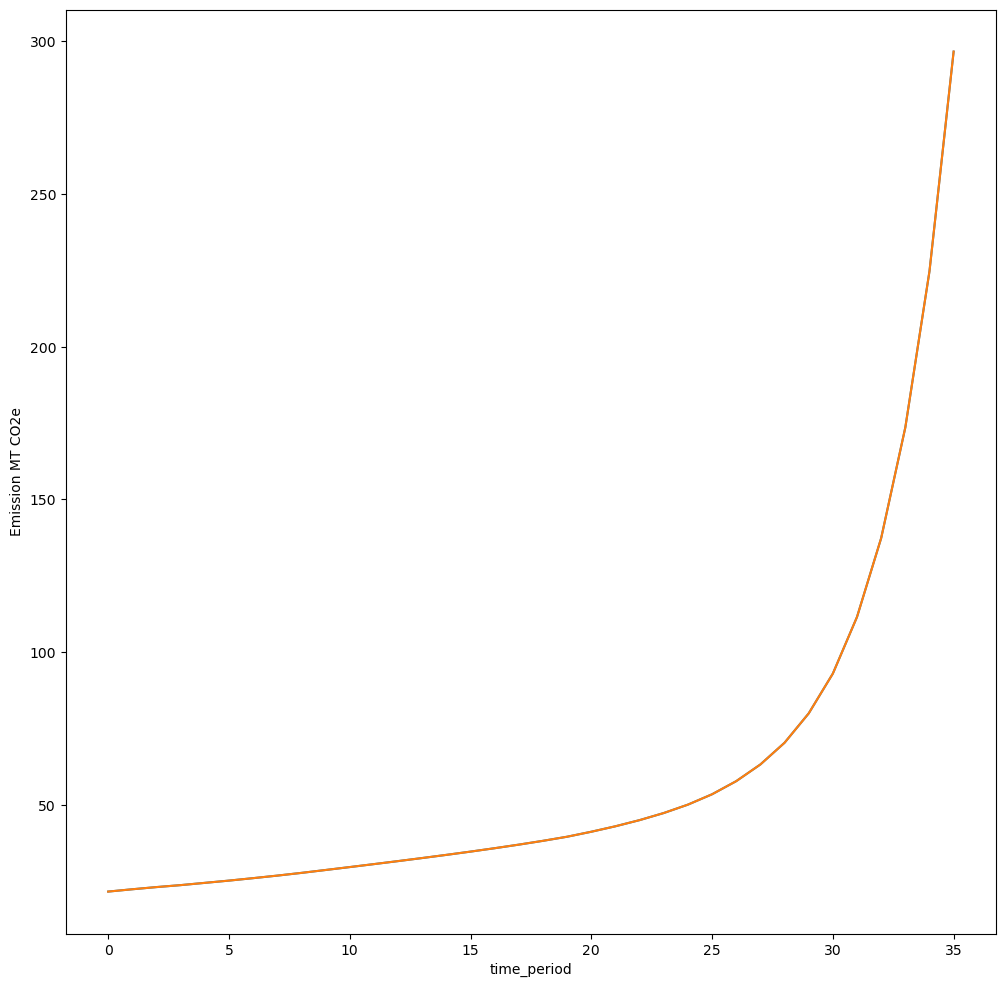

In [30]:
fig, ax = plt.subplots(figsize = (12, 12))
ax.set_xlabel(ssp.key_time_period)
ax.set_ylabel("Emission MT CO2e")
# 
all_primaries = sorted(list(df_out_region[ssp.key_primary].unique()))
dfg = df_out_region.groupby([ssp.key_primary])

for i, df_cur in dfg:
  
    
    y = np.array(df_cur[
        [x for x in df_out.columns if x.startswith("emission_co2e_subsector_")]
    ].sum(axis = 1)) 
    x = np.array(df_cur[ssp.key_time_period])
    
    ax.plot(x, y)
    
plt.show()


In [32]:
# For the sensitivity analysis of Iran we are interested in the output emissions per subsector and in the period 0
[i for i in df_out.columns if i.startswith('emission_co2e_subsector')]

['emission_co2e_subsector_total_agrc',
 'emission_co2e_subsector_total_ccsq',
 'emission_co2e_subsector_total_entc',
 'emission_co2e_subsector_total_fgtv',
 'emission_co2e_subsector_total_frst',
 'emission_co2e_subsector_total_inen',
 'emission_co2e_subsector_total_ippu',
 'emission_co2e_subsector_total_lndu',
 'emission_co2e_subsector_total_lsmm',
 'emission_co2e_subsector_total_lvst',
 'emission_co2e_subsector_total_scoe',
 'emission_co2e_subsector_total_soil',
 'emission_co2e_subsector_total_trns',
 'emission_co2e_subsector_total_trww',
 'emission_co2e_subsector_total_waso']

In [35]:
subsectors_to_review = ['primary_id',
                        'region',
                        'time_period',
                        'emission_co2e_subsector_total_agrc',
                        'emission_co2e_subsector_total_entc',
                        'emission_co2e_subsector_total_fgtv',
                        'emission_co2e_subsector_total_frst',
                        'emission_co2e_subsector_total_inen',
                        'emission_co2e_subsector_total_ippu',
                        'emission_co2e_subsector_total_lndu',
                        'emission_co2e_subsector_total_scoe',
                        'emission_co2e_subsector_total_trns',
                        'emission_co2e_subsector_total_waso',
                        'emission_co2e_subsector_total_trww']

In [36]:
df_subsectors = df_out[subsectors_to_review]
df_subsectors.head()

,primary_id,region,time_period,emission_co2e_subsector_total_agrc,emission_co2e_subsector_total_entc,emission_co2e_subsector_total_fgtv,emission_co2e_subsector_total_frst,emission_co2e_subsector_total_inen,emission_co2e_subsector_total_ippu,emission_co2e_subsector_total_lndu,emission_co2e_subsector_total_scoe,emission_co2e_subsector_total_trns
0,0,iran,0,1.170428,0.651347,0.118114,-12.156748,0.939047,22.101539,0.064192,0.673469,1.770557
1,0,iran,1,1.168627,0.659911,0.118511,-12.284442,0.937720,22.734456,0.064289,0.692676,1.799086
2,0,iran,2,1.180451,0.670620,0.118853,-12.360322,0.939759,23.261045,0.064146,0.709119,1.825165
3,0,iran,3,1.193655,0.680660,0.119141,-12.389432,0.941580,23.682243,0.063866,0.722824,1.848861
4,0,iran,4,1.207701,0.691046,0.119450,-12.379826,0.943746,24.161919,0.063472,0.737825,1.872707


In [37]:
# This is what we are insterested in. The intial conditions and this is what we are going to evaluate.
df_period_zero = df_subsectors[df_subsectors.time_period == 0]
df_period_zero

,primary_id,region,time_period,emission_co2e_subsector_total_agrc,emission_co2e_subsector_total_entc,emission_co2e_subsector_total_fgtv,emission_co2e_subsector_total_frst,emission_co2e_subsector_total_inen,emission_co2e_subsector_total_ippu,emission_co2e_subsector_total_lndu,emission_co2e_subsector_total_scoe,emission_co2e_subsector_total_trns
0,0,iran,0,1.170428,0.651347,0.118114,-12.156748,0.939047,22.101539,0.064192,0.673469,1.770557
36,58058,iran,0,1.170428,0.651347,0.118114,-12.156748,0.939047,22.101539,0.064192,0.673469,1.770557
